 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_df.isna().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(
    algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_df.isna().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df.isna().count()

Close    1649
dtype: int64

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_df.dropna()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_df["Close"] = sp500_df["Close"].str.replace('$','')
sp500_df["Close"] = sp500_df["Close"].astype('float64').pct_change()
#sp500_df["Close"].pct_change()
#sp500_df["Close"] = sp500_df["Close"].pct_change()
#daily_sp500 = sp500_df.pct_change()

In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_df.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_df.columns = ["S&P 500"]
sp500_df.dropna().head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
all_prices = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
all_prices = all_prices.reset_index()
all_prices.set_index("Date")
all_prices = all_prices.dropna()
all_prices.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

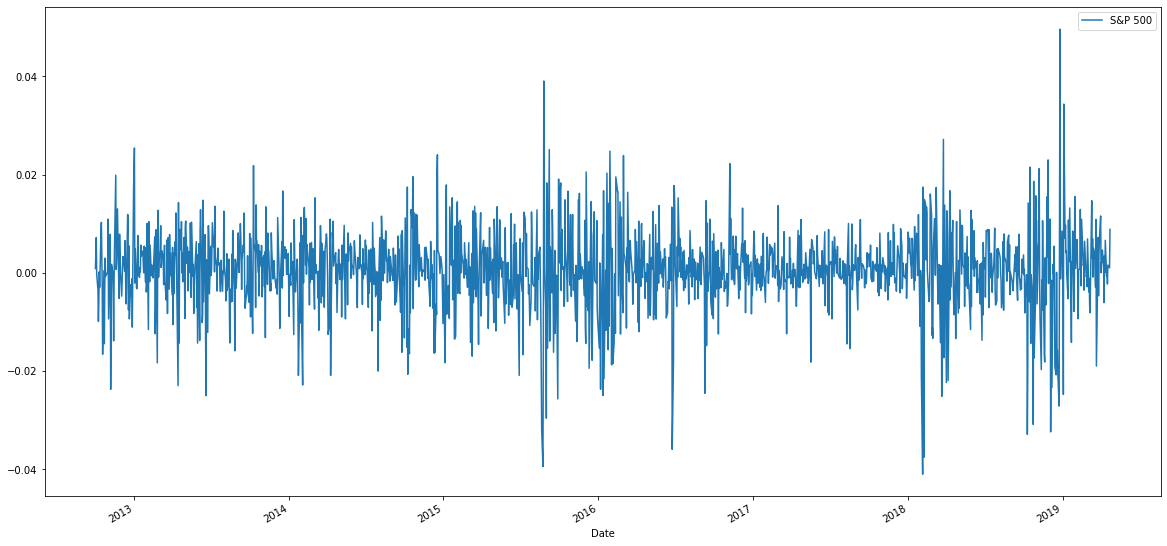

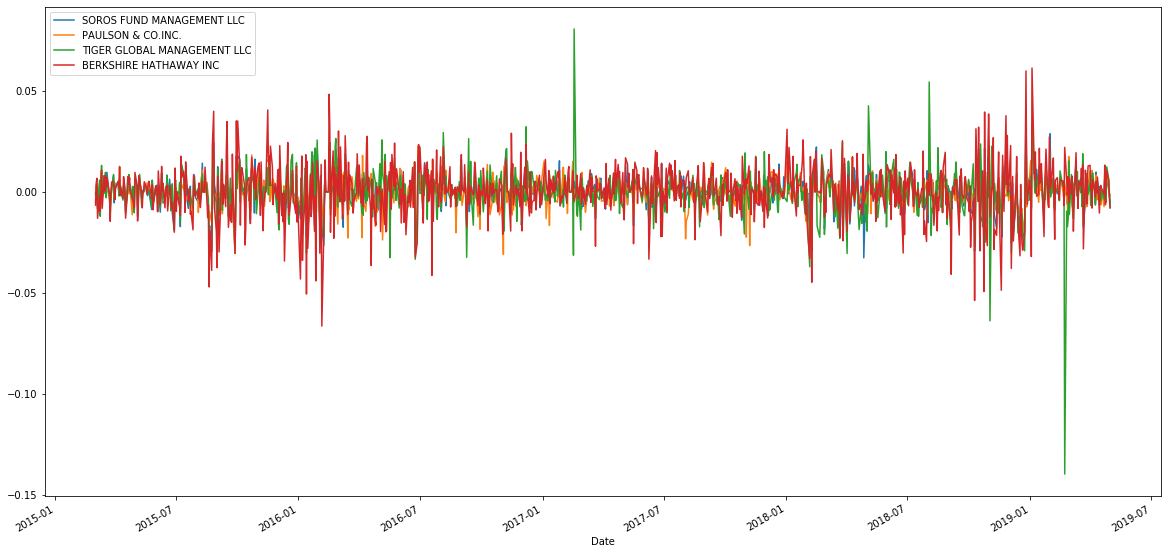

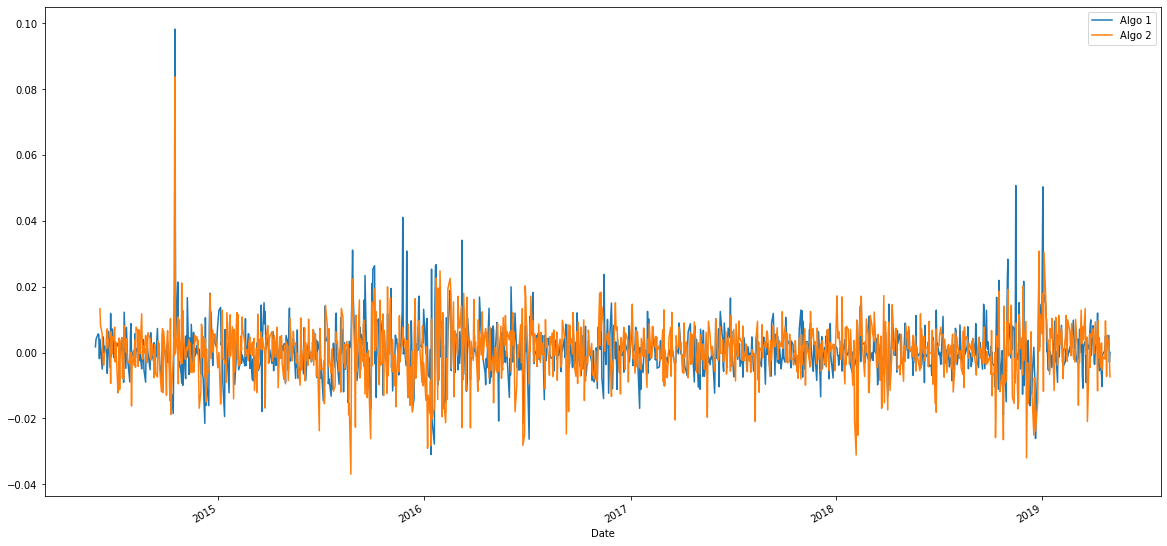

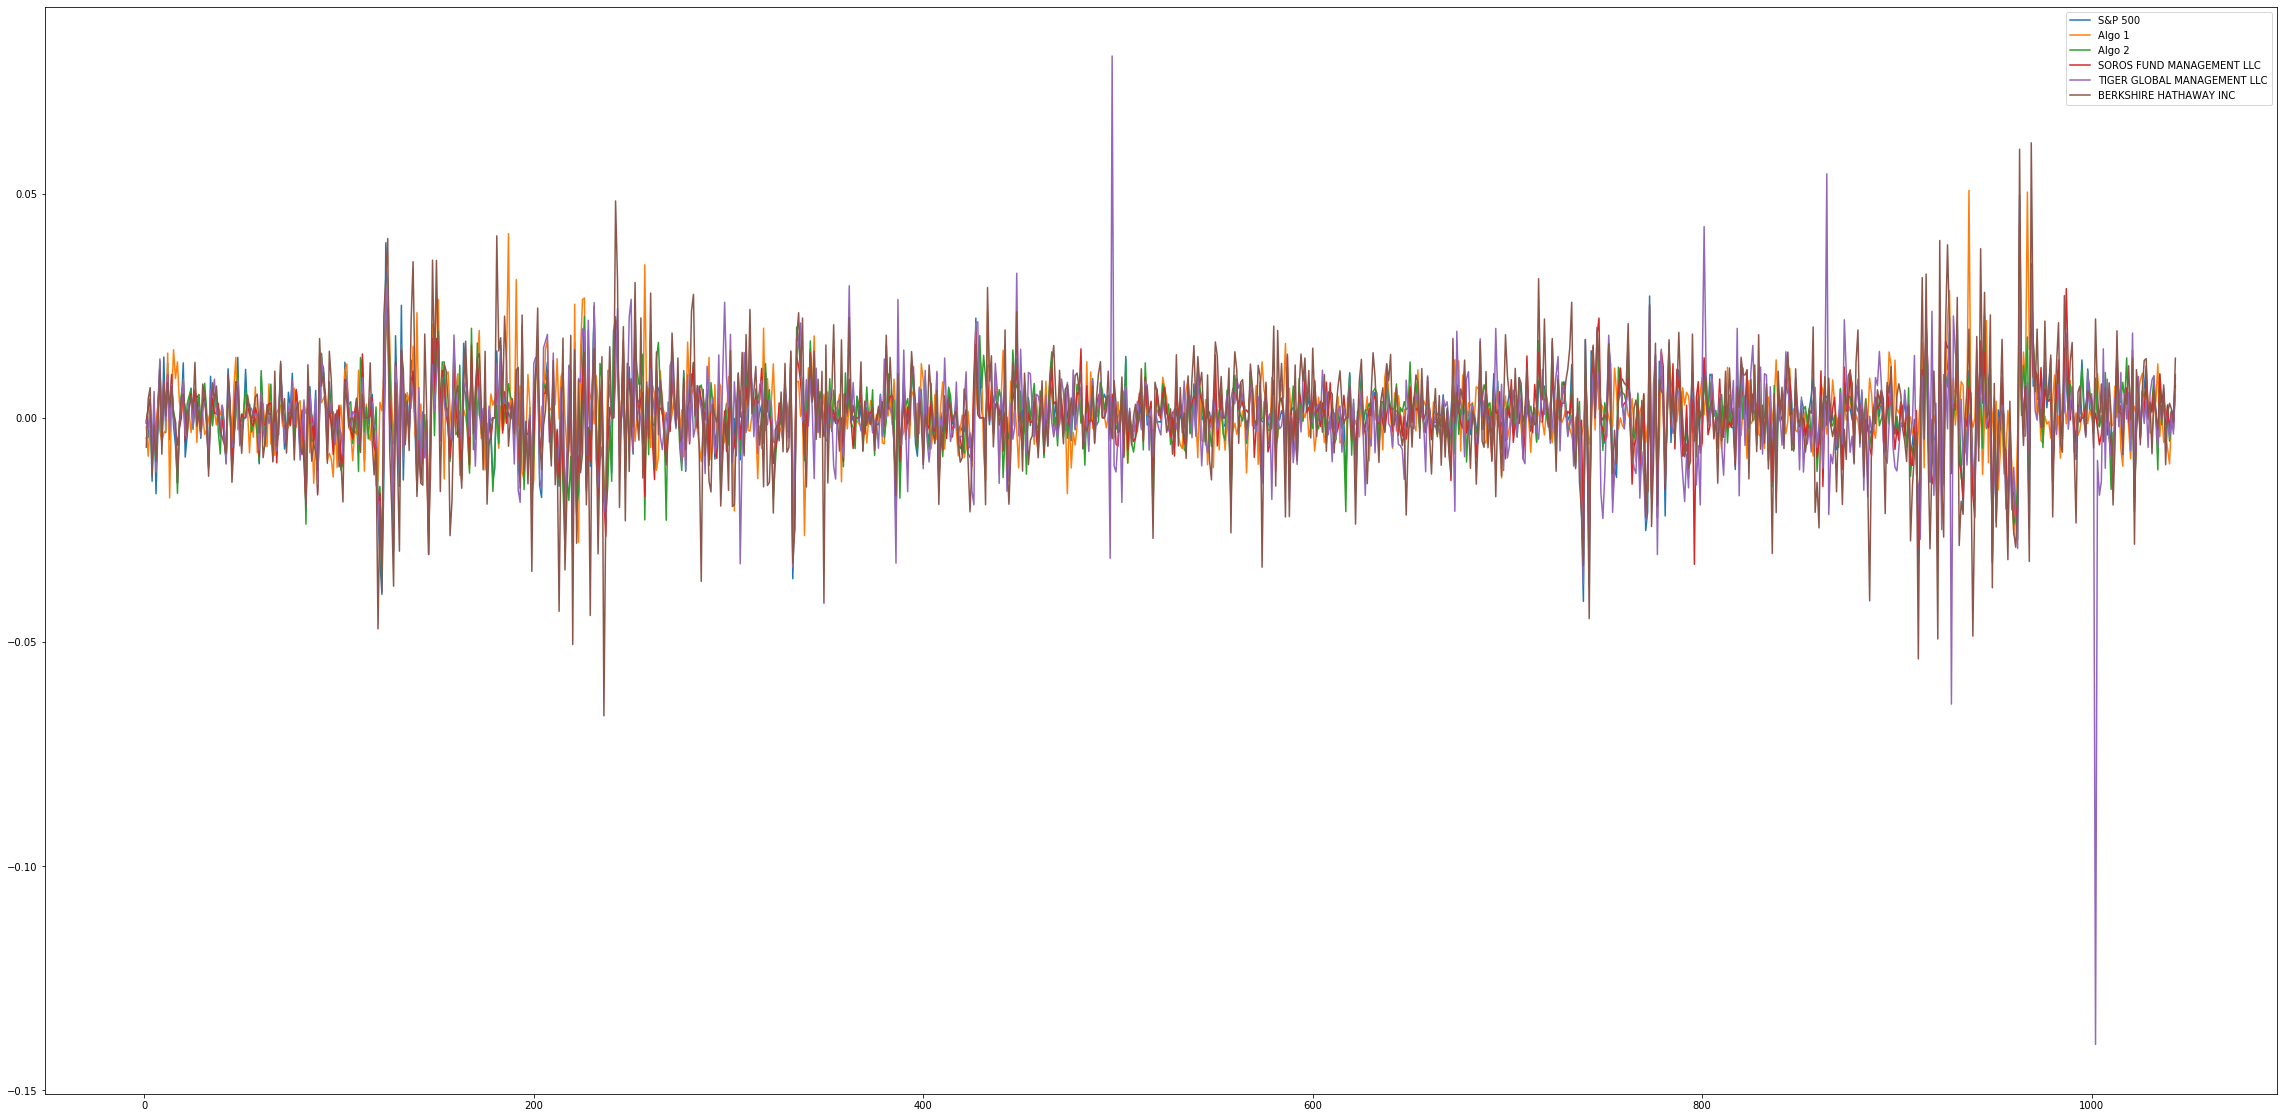

In [15]:
# Plot daily returns
# YOUR CODE HERE

#Plotting all charts seperately first
sp500_df.plot(figsize=(20, 10))
whale_df.plot(figsize=(20, 10))
algo_df.plot(figsize=(20, 10))

#Plotting all charts combined
all_returns = all_prices[['S&P 500', 
            'Algo 1', 'Algo 2', 
            'SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'
           ]].plot(figsize=(40,20)) 

#When I try to add 'PAULSON & CO.INC.', am getting an error message saying; 'PAULSON & CO.INC. is not an index'


#all_prices[[sp500_df], [whale_df], [algo_df]]#, 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']].plot(figsize=(20,20)) 
#all_prices.plot()

In [16]:
# Plot cumulative returns
# YOUR CODE HERE

#_________________________________________________________________________________________
#Source: 'https://stackoverflow.com/questions/61153546/addition-subtraction-of-integers-and-integer-arrays-with-timestamp-is-no-longer'
#date = pd.date_range('2004-01-01', '2018-01-01', freq="AS")    # your code
#freq = 'D'                                                     # 'H' for hours, etc.
#date = date + pd.Timedelta(3, unit=freq)                       # Perform the action
#print(date)
#__________________________________________________________________________________________

###  Keep getting an error saying "TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`"
###  cumulative_returns = (1+all_prices).cumprod() -1
###  cumulative_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Standard Deviation for all portfolios:
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
S&P 500    0.008111
dtype: float64
Algo 1    0.007972
Algo 2    0.008466
dtype: float64
Box Plot for each portfolio return:
Based on this chart, the portfolio with the highest risk relative to standard deviation is BERKSHIRE HATHAWAY INC portfolio.
BERKSHIRE HATHAWAY INC has the highest deviation from the mean equal to 0.012831 .
S&P 500 has a standard deviation of S&P 500    0.008111
dtype: float64.
Thus SOROS FUND MANAGEMENT LLC (0.007842), PAULSON & CO.INC. (0.006977) and Algo 1 (0.007972) portfolios are less riskier than S&P 500 based on their standard deviation.


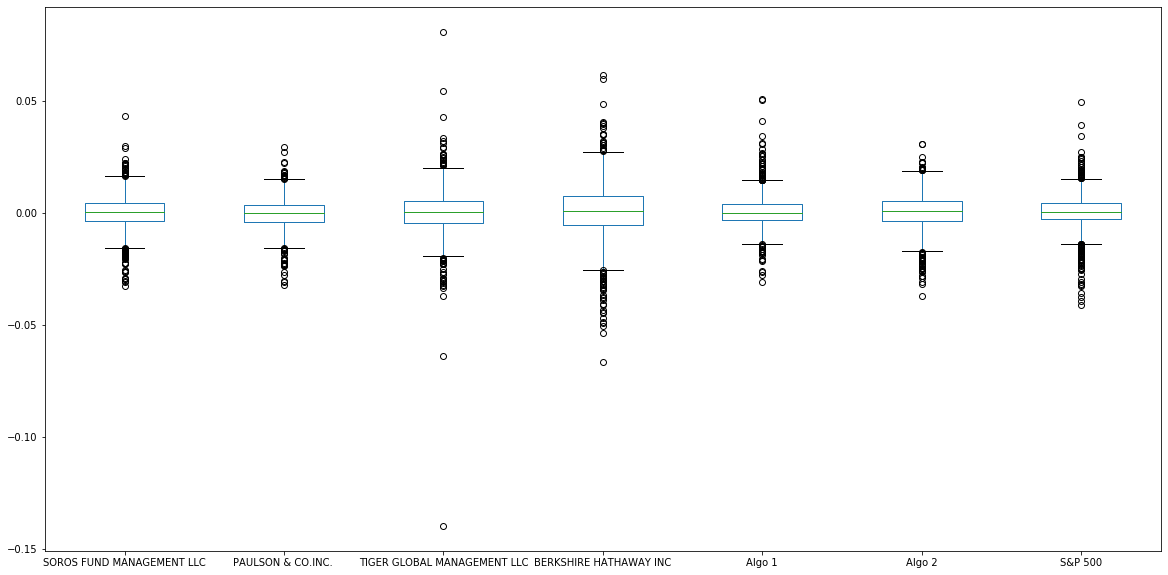

In [17]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
print('\033[1m' + 'Standard Deviation for all portfolios:' + '\033[0m')
whale_df_std = whale_df.std()
print(whale_df_std)
#whale_df_std.plot.box()
#print(f"{whale_df_std} \r{sp500_df_std} \r{algo_df_std}")

sp500_df_std = sp500_df.std()
print(sp500_df_std)
#sp500_df_std.plot.box()

algo_df_std = algo_df.std()
print(algo_df_std)
#algo_df_std.plot.box()


# Box plot to visually show risk
# YOUR CODE HERE
print('\033[1m' + 'Box Plot for each portfolio return:' + '\033[0m')
all_prices.plot.box(figsize=(20, 10))

#all_returns_std.plot.box(figsize=(20,8), color='red')

print("Based on this chart, the portfolio with the highest risk relative to standard deviation is BERKSHIRE HATHAWAY INC portfolio.")
print('\033[1m' + "BERKSHIRE HATHAWAY INC" + '\033[0m' " has the highest deviation from the mean equal to 0.012831 .")
#print(f"Whale STD: \n{whale_df_std}\n{algo_df_std}\n{sp500_df_std}").values

#all_returns_std.plot(x='my_timestampe', y='col_A', kind='box')


# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
print(f"S&P 500 has a standard deviation of {sp500_df_std}.")
print(f"Thus SOROS FUND MANAGEMENT LLC (0.007842), PAULSON & CO.INC. (0.006977) and Algo 1 (0.007972) portfolios are less riskier than S&P 500 based on their standard deviation.")



# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE


In [18]:
#all_returns_std = pd.concat([whale_df_std, algo_df_std, sp500_df_std], axis="columns", join="inner")
#all_returns_std.head()

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

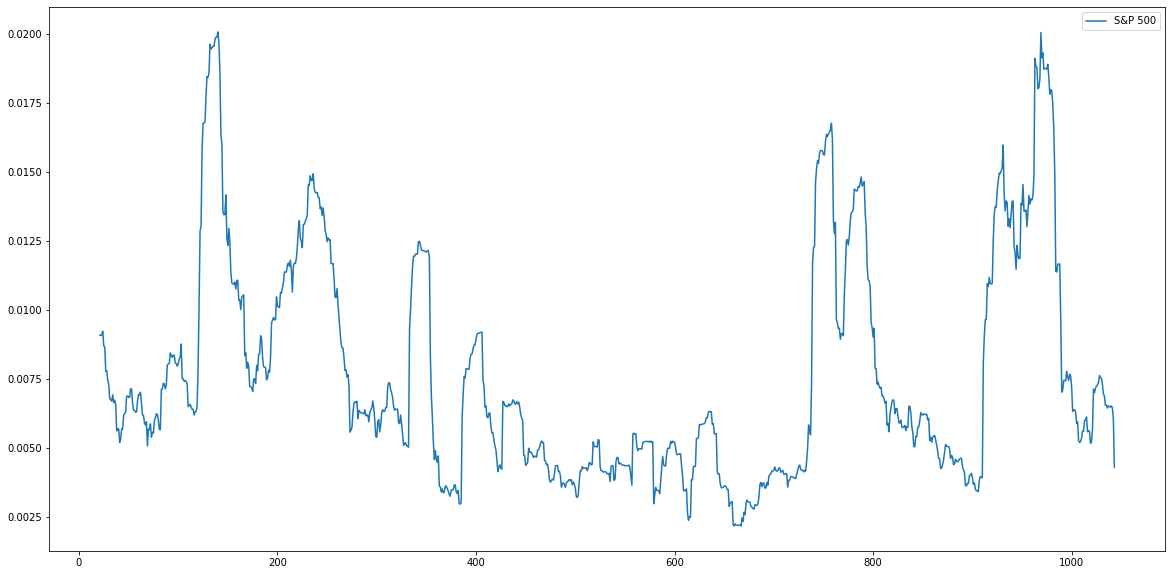

In [19]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
all_prices_rolling_21 = all_prices[["S&P 500"]].rolling(window=21).std()
all_prices_rolling_21.plot(figsize=(20,10));

Algo 2 portfolio is the portfolio which is the most similar to S&P 500 index based on correlation
It is also possible to see the strong correlation between portfolio 'Algo 2' and 'S&P 500' from the scatter chart below


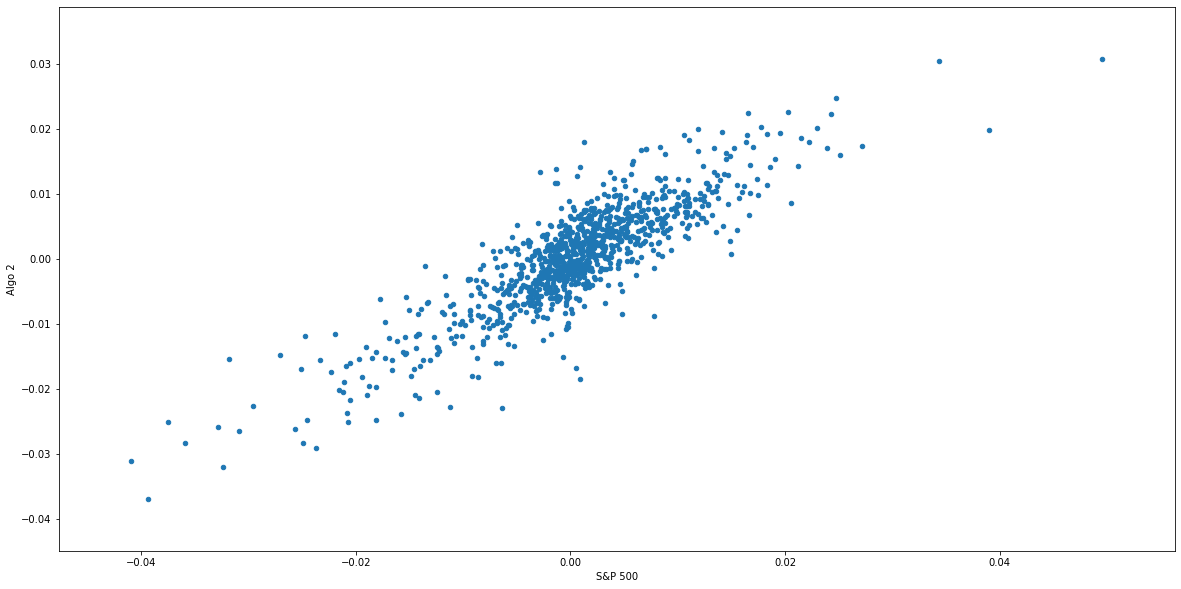

In [20]:
# Construct a correlation table
# YOUR CODE HERE
correlation_sp500 = pd.DataFrame(all_prices.corr()).loc[:, "S&P 500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
print(f"Algo 2 portfolio is the portfolio which is the most similar to S&P 500 index based on correlation")
print("It is also possible to see the strong correlation between portfolio 'Algo 2' and 'S&P 500' from the scatter chart below")
all_prices.plot(kind="scatter", y="Algo 2", x="S&P 500", figsize = (20,10));

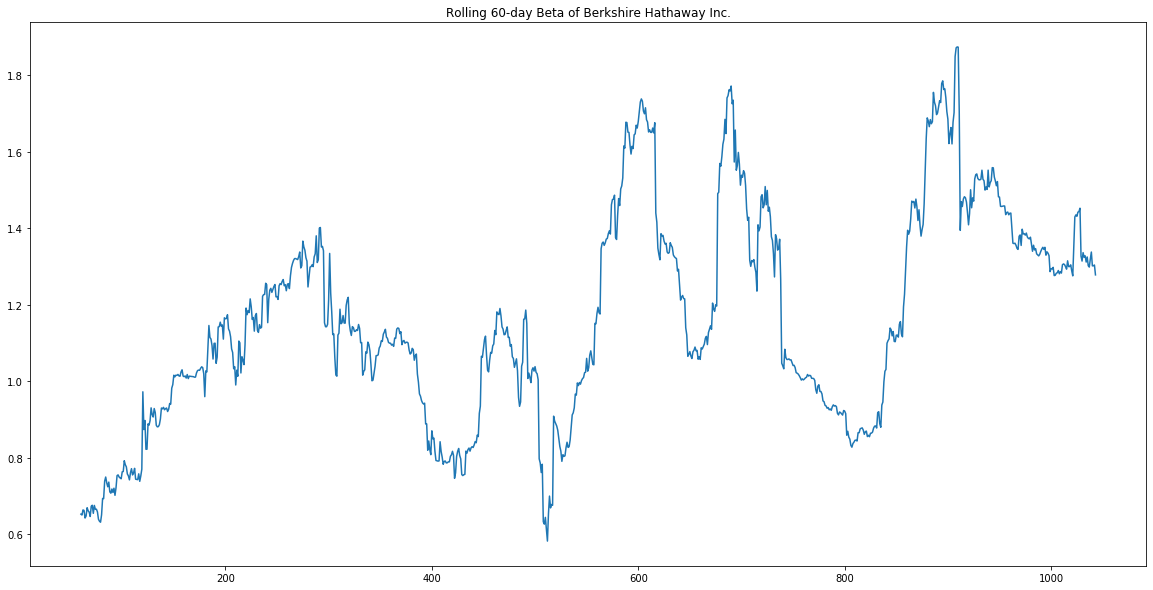

In [21]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = all_prices['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_prices['S&P 500'])
variance = all_prices['S&P 500'].rolling(window=60).var()
beta = covariance / variance
beta.plot(figsize=(20,10), title="Rolling 60-day Beta of Berkshire Hathaway Inc.");

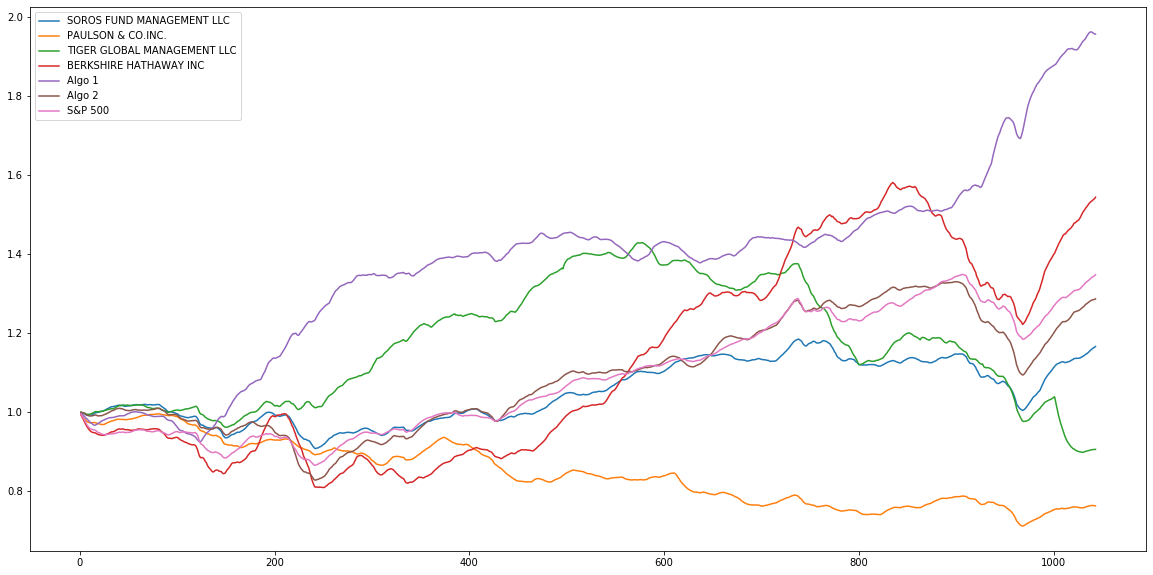

In [22]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
all_prices_ewm = all_prices.ewm(span=21, adjust=False).mean()
(1+all_prices_ewm).cumprod().plot(figsize=(20,10));

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = all_prices.mean()*252/(all_prices.std()*np.sqrt(252))
sharpe_ratio

/Users/erenturkmenoglu/opt/anaconda3/envs/UW_FinTech/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

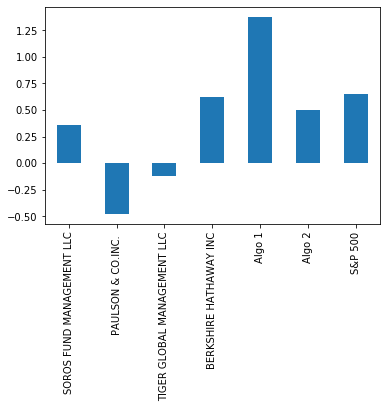

In [28]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot.bar();

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:
* The only portfolio which has a better sharpe ratio than S&P 500 is Algo 1 with a sharpe ratio of 1.378 compared to S&P500's 0.648.

* Algo 2 portfolio does not outperform the S&P 500 alone with a sharpe ratio of 0.501.

* If we combine the two algo strategies, Algo 1 and Algo 2 with sharpe ratios of 1.378 and 0.501 respectively, we get an average sharpe ratio of 0.94.")

* Therefore, it is possible to conclude that our algorithmic portfolios outperforms the S&P 500 index.



---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Read the first stock
# YOUR CODE HERE
aapl_1year_historical = pd.read_csv(Path("APPLE.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
aapl_1year_historical.rename(columns = {"Close":"AAPL"}, inplace = True)
aapl_1year_historical.head()

,AAPL
Date,
2019-09-03 16:00:00,51.43
2019-09-04 16:00:00,52.30
2019-09-05 16:00:00,53.32
2019-09-06 16:00:00,53.32
2019-09-09 16:00:00,53.54


In [30]:
# Read the second stock
# YOUR CODE HERE
amzn_1year_historical = pd.read_csv(Path("AMAZON.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
amzn_1year_historical.rename(columns = {"Close":"AMZN"}, inplace = True)
amzn_1year_historical.head()

,AMZN
Date,
2019-09-03 16:00:00,1789.84
2019-09-04 16:00:00,1800.62
2019-09-05 16:00:00,1840.72
2019-09-06 16:00:00,1833.51
2019-09-09 16:00:00,1831.35


In [31]:
# Read the third stock
# YOUR CODE HERE
tsla_1year_historical = pd.read_csv(Path("TESLA.csv"), index_col="Date", parse_dates = True, infer_datetime_format= True)
tsla_1year_historical.rename(columns = {"Close":"TSLA"}, inplace = True)
tsla_1year_historical.head()

,TSLA
Date,
2019-09-03 16:00:00,45.00
2019-09-04 16:00:00,44.14
2019-09-05 16:00:00,45.92
2019-09-06 16:00:00,45.49
2019-09-09 16:00:00,46.36


In [32]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat((aapl_1year_historical, amzn_1year_historical, tsla_1year_historical), axis=1, join="inner")
combined_df.sort_index(ascending = True, inplace = True)
print("HEAD")
print(combined_df[['AAPL', 'AMZN', 'TSLA']].head())
print()
print()
print("TAIL")
print(combined_df[['AAPL', 'AMZN', 'TSLA']].tail())

HEAD
                      AAPL     AMZN   TSLA
Date                                      
2019-09-03 16:00:00  51.43  1789.84  45.00
2019-09-04 16:00:00  52.30  1800.62  44.14
2019-09-05 16:00:00  53.32  1840.72  45.92
2019-09-06 16:00:00  53.32  1833.51  45.49
2019-09-09 16:00:00  53.54  1831.35  46.36


TAIL
                       AAPL     AMZN    TSLA
Date                                        
2020-09-03 16:00:00  120.88  3368.00  407.00
2020-09-04 16:00:00  120.96  3294.62  418.32
2020-09-08 16:00:00  112.82  3149.84  330.21
2020-09-09 16:00:00  117.32  3268.61  366.28
2020-09-10 16:00:00  113.49  3175.11  371.34


In [33]:
# Reset the index
# YOUR CODE HERE
combined_df.index = combined_df.index.normalize()

In [34]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

Text(0.5, 1.0, 'Combined Individual Stock Performance')

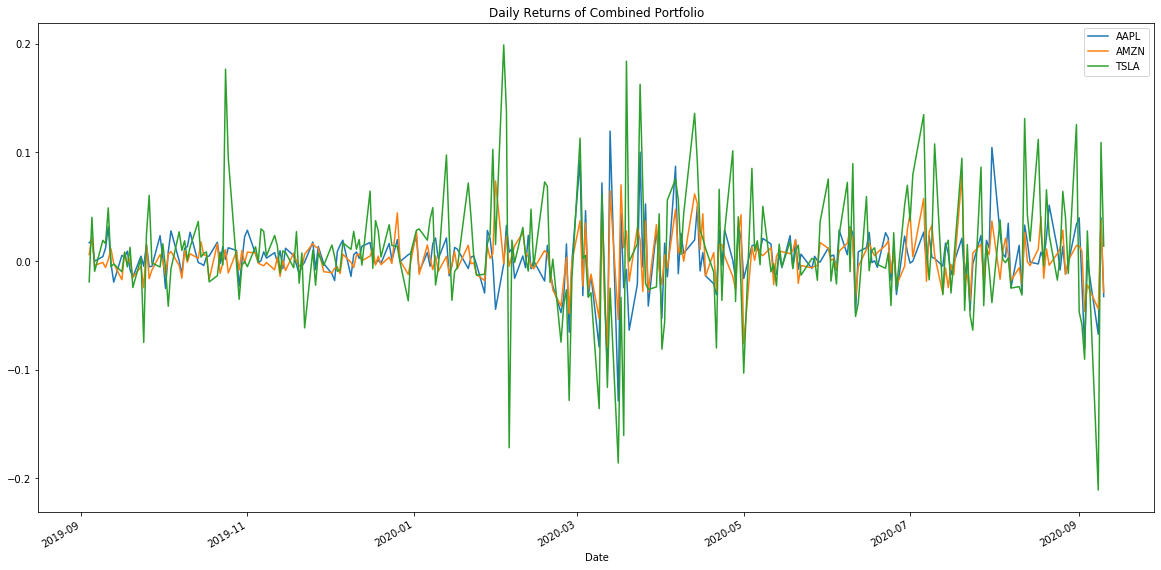

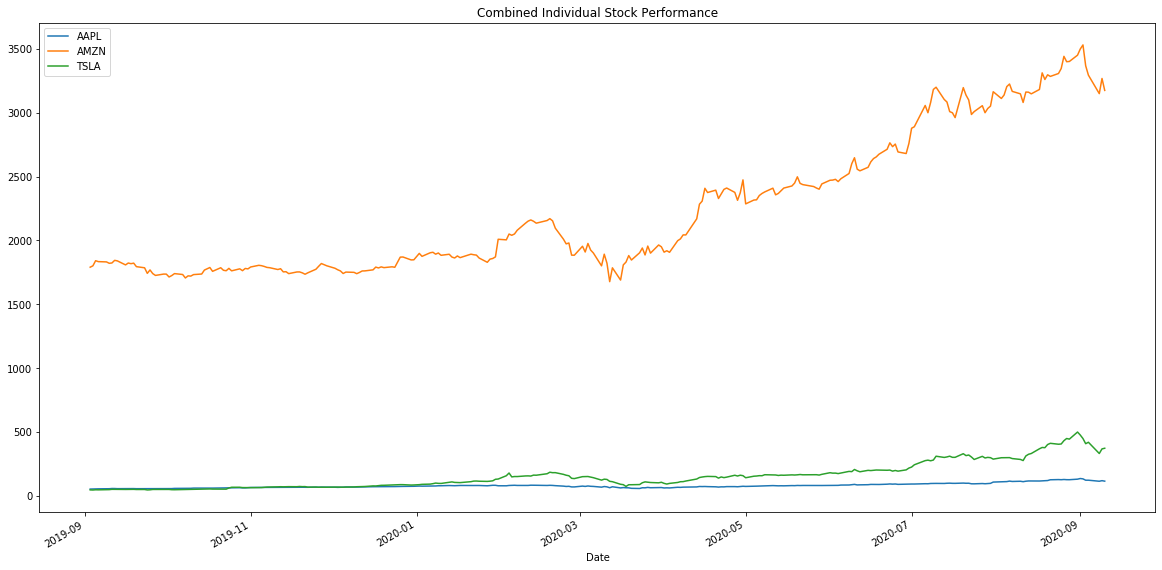

In [43]:
# Drop Nulls
# YOUR CODE HERE
combined_df.dropna(inplace=True)
combined_daily = combined_df.pct_change()
combined_daily.plot(figsize=(20, 10)).set_title("Daily Returns of Combined Portfolio");
combined_df.plot(figsize=(20, 10)).set_title("Combined Individual Stock Performance")

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

Date
2019-09-04    0.005720
2019-09-05    0.022614
2019-09-06   -0.003938
2019-09-09   -0.000554
2019-09-10   -0.004872
dtype: float64

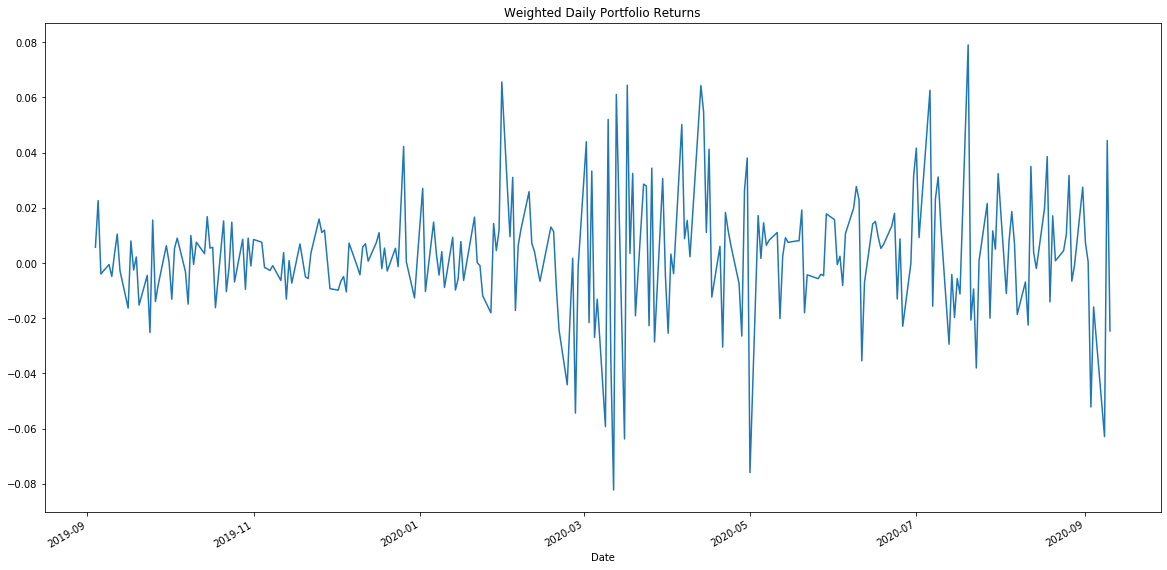

In [55]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
#my_portfolio = combined_df['AAPL']*1/3+combined_df['AMZN']*1/3+combined_df['TSLA']*1/3

# YOUR CODE HERE
my_portfolio = combined_df.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.plot(figsize=(20,10)).set_title("Weighted Daily Portfolio Returns")
my_portfolio_returns.dropna(inplace = True)
my_portfolio_returns.head()

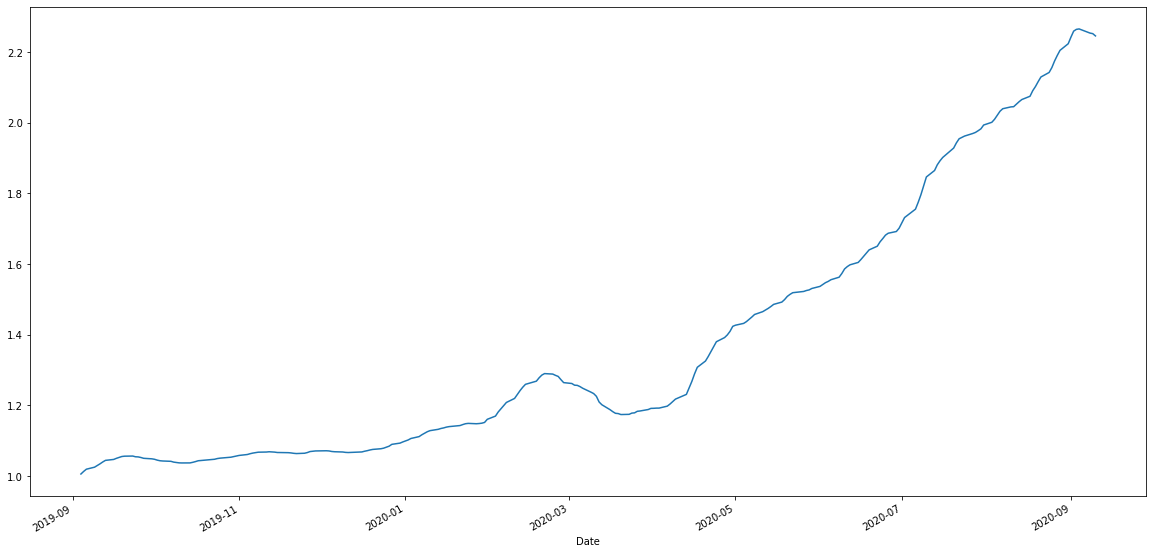

In [46]:
my_portfolio__returns_ewm = my_portfolio_returns.ewm(span=21, adjust=False).mean()
(1+my_portfolio__returns_ewm).cumprod().plot(figsize=(20,10));

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

## Add your "Custom" portfolio to the larger dataframe of fund returns

In [81]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_combined = pd.concat((my_portfolio, all_prices), axis = 1, join = "outer")
all_combined.rename(columns = {0:"My_Portfolio"}, inplace = True)
all_combined.index = all_combined.index.normalize()
#all_combined.index = all_combined.index.date
#all_combined.index = pd.to_datetime(all_combined.index,format="%Y-%m-%d")
all_combined.head().dropna()

#all_combined.dropna()
#all_combined.plot()

,My_Portfolio,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [84]:
# Risk
# YOUR CODE HERE
all_combined_std = pd.DataFrame(all_combined.std())
all_combined_std.dropna().head()

,0
My_Portfolio,217.566223


In [90]:
# Rolling
# YOUR CODE HERE
all_combined_rolling_21 = all_combined[["My Portfolio"]].rolling(window=21).std()
all_combined_rolling_21.plot(figsize=(20,10));

KeyError: "None of [Index(['My Portfolio'], dtype='object')] are in the [columns]"

In [95]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio_my_portfolio = my_portfolio.mean()*252/(my_portfolio.std()*np.sqrt(252))
sharpe_ratio_my_portfolio

60.1081461141146

In [96]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_my_portfolio.plot()

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [98]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_my_portfolio = pd.DataFrame(my_portfolio.corr()).loc[:, "My_Portfolio"]
correlation_my_portfolio[correlation_my_portfolio==correlation_my_portfolio[correlation_<1].max()]
correlation_my_portfolio.plot(kind="scatter", y="My Prtfolio", x="S&P 500", figsize = (20,10));

TypeError: corr() missing 1 required positional argument: 'other'

In [100]:
# Beta
# YOUR CODE HERE
covariance_1 = my_portfolio['My_Portfolio'].rolling(window=60).cov(my_portfolio['S&P 500'])
variance_1 = my_portfolio['My_Portfolio'].rolling(window=60).var()
beta_1 = covariance_1 / variance_1
beta.plot(figsize=(20,10), title="Rolling 60-day Beta of My Portfolio");

KeyError: 'My_Portfolio'